# Los Angeles AirBnb EDA

Problem Statement = Develop the best possible predictor of airbnb rentals to provide users of the model with the most savings in their vacation rental. The model will continuosly learn from recent data to provide up to date data.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(42)

pd.options.mode.chained_assignment = None

The data I will be reading in is for the quarter of (06 June, 2022), all listings in Los Angeles, California

In [88]:
# !unzip ../data/listings_1.csv.zip

In [3]:
airbnb = pd.read_csv('./listings_1.csv')

In [4]:
airbnb.shape

(40438, 75)

In [5]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,65467,https://www.airbnb.com/rooms/65467,20221206172243,2022-12-07,city scrape,A Luxury Home in Los Angeles,<b>The space</b><br />Private 16 x 15 ft room ...,NaN,https://a0.muscache.com/pictures/821696/64d8a6...,61864,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,206662,https://www.airbnb.com/rooms/206662,20221206172243,2022-12-07,city scrape,"Hollywood & Hiking, 30 day minimum","Semi-Private, vaccinated only, you will be sta...",The quietest part of Hollywood yet still walka...,https://a0.muscache.com/pictures/30274679/5011...,33861,...,4.92,4.92,4.87,NaN,f,1,0,1,0,0.71
2,67089,https://www.airbnb.com/rooms/67089,20221206172243,2022-12-07,city scrape,Tranquil Guesthouse Oasis with a Hot Tub,Relax in a hammock or hot tub in a secluded ba...,The bungalow sits behind the main house down t...,https://a0.muscache.com/pictures/87cd0874-9acc...,210344,...,4.94,4.91,4.87,NaN,f,2,2,0,0,4.80
3,210489,https://www.airbnb.com/rooms/210489,20221206172243,2022-12-07,city scrape,3br 3ba townhome near Beverly Hills,"Beverly Hills area, very safe, quiet and centr...",Great neighborhood! Two blocks to Beverly Hil...,https://a0.muscache.com/pictures/7589741/7e3fc...,76111,...,4.93,4.43,4.64,Exempt - This listing is a transient occupancy...,f,2,1,1,0,0.14
4,109,https://www.airbnb.com/rooms/109,20221206172243,2022-12-07,city scrape,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40438 entries, 0 to 40437
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            40438 non-null  int64  
 1   listing_url                                   40438 non-null  object 
 2   scrape_id                                     40438 non-null  int64  
 3   last_scraped                                  40438 non-null  object 
 4   source                                        40438 non-null  object 
 5   name                                          40436 non-null  object 
 6   description                                   39701 non-null  object 
 7   neighborhood_overview                         23505 non-null  object 
 8   picture_url                                   40438 non-null  object 
 9   host_id                                       40438 non-null 

## Feature Selection

Price is the target variable so first I will examine the values in the column.

In [7]:
# https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas
airbnb['price']

0        $300.00
1         $46.00
2        $140.00
3        $340.00
4        $115.00
          ...   
40433    $128.00
40434    $180.00
40435    $104.00
40436    $167.00
40437     $81.00
Name: price, Length: 40438, dtype: object

The values are being read in as objects beacuse of the "$" symbol, so I will strip it to only number and change the type to float.

In [8]:
airbnb['price'] = airbnb['price'].replace('[\$,]','', regex=True).astype(float)

Now that the target variable is a float I can use the correlation method and identify the numerical values most valuable to the model.

In [9]:
airbnb.corr()[['price']].sort_values(by = 'price', ascending = False)

,price
price,1.000000
bedrooms,0.266354
accommodates,0.219797
beds,0.195037
availability_30,0.048371
availability_60,0.044304
availability_90,0.039580
review_scores_location,0.030744
availability_365,0.026461
review_scores_cleanliness,0.022063


'bedrooms', 'accommodates', and 'beds' have the highest correlation with the 'price' variable so they will be selected for initial modeling. Correlation only takes into account numerical variables so later on categorical values will be examined and selected.

In [10]:
features = ['bedrooms', 'accommodates', 'beds', 'price']

airbnb1 = airbnb[features]

airbnb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40438 entries, 0 to 40437
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      36835 non-null  float64
 1   accommodates  40438 non-null  int64  
 2   beds          39688 non-null  float64
 3   price         40438 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.2 MB


## Null Values

Chosen variables appear to have a number of null values

In [11]:
airbnb1.isnull().sum()

bedrooms        3603
accommodates       0
beds             750
price              0
dtype: int64

In [12]:
airbnb1.describe()

,bedrooms,accommodates,beds,price
count,36835.000000,40438.000000,39688.000000,40438.000000
mean,1.771576,3.865152,2.134751,279.449599
std,1.185307,2.727557,1.571691,1136.463138
min,1.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,85.000000
50%,1.000000,3.000000,2.000000,138.000000
75%,2.000000,5.000000,3.000000,235.000000
max,24.000000,16.000000,32.000000,99999.000000


In [13]:
airbnb1['bedrooms'].value_counts()

1.0     21610
2.0      7511
3.0      4322
4.0      2110
5.0       836
6.0       280
7.0        91
8.0        42
9.0        11
10.0        7
14.0        4
12.0        3
13.0        3
11.0        2
24.0        1
16.0        1
23.0        1
Name: bedrooms, dtype: int64

In [14]:
airbnb1['beds'].value_counts()

1.0     18456
2.0     10221
3.0      4802
4.0      3103
5.0      1512
6.0       806
7.0       355
8.0       227
9.0        73
10.0       46
12.0       23
11.0       23
14.0       10
13.0        7
16.0        6
15.0        6
19.0        2
17.0        2
18.0        2
20.0        2
23.0        1
24.0        1
32.0        1
21.0        1
Name: beds, dtype: int64

Upon further examination there does not appear to be any option of inputting 0 bedrooms (studio apartment) or 0 beds (alternate accomodations) so I will assume that is why the numbers appear as null and fill them accordingly.

In [15]:
airbnb1 = airbnb1.fillna(0)

In [16]:
airbnb1.isnull().sum()

bedrooms        0
accommodates    0
beds            0
price           0
dtype: int64

## EDA

I will perform some data visualization to get a sense of what the variables look like

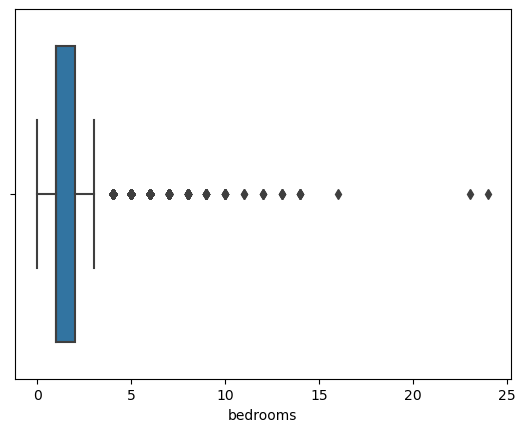

In [17]:
sns.boxplot(x = airbnb1['bedrooms']);

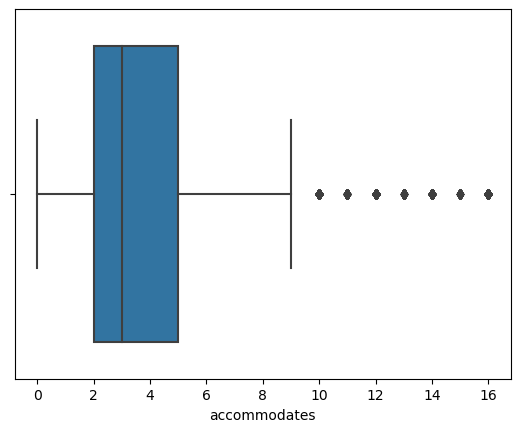

In [18]:
sns.boxplot(x = airbnb1['accommodates']);

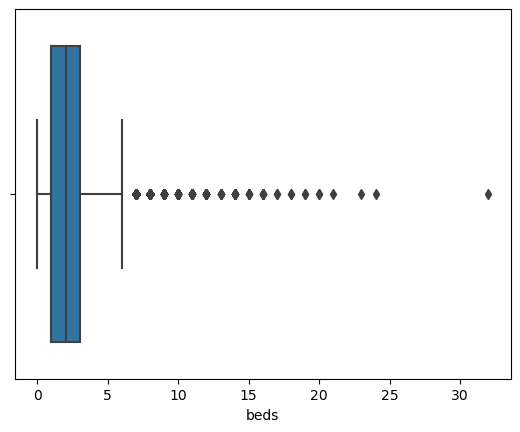

In [19]:
sns.boxplot(x = airbnb1['beds']);

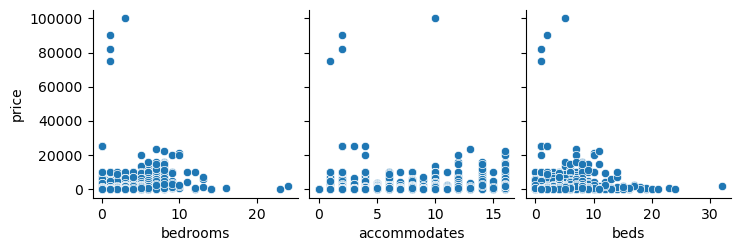

In [20]:
sns.pairplot(airbnb1, y_vars = ['price'], x_vars = ['bedrooms', 'accommodates', 'beds']);

There seem to be some some outliers, need further examination

In [21]:
airbnb1.sort_values(by = ['price'], ascending=False).head(15)

,bedrooms,accommodates,beds,price
37631,3.0,10,5.0,99999.0
27380,1.0,2,2.0,90150.0
37614,1.0,2,1.0,82110.0
10780,1.0,1,1.0,75100.0
21484,0.0,2,1.0,25000.0
21531,0.0,2,1.0,25000.0
21535,0.0,2,1.0,25000.0
21539,0.0,3,2.0,25000.0
21540,0.0,2,1.0,25000.0
21544,0.0,4,2.0,25000.0


10 of the 40,438 listings are super luxurious and I need to eliminate them to get a better visualization of the data. Seeing as how they are outliers and so rare I don't forsee a significant impact on the model accuracy.

In [22]:
airbnb1 = airbnb1[airbnb1['price'] < 25000.0]

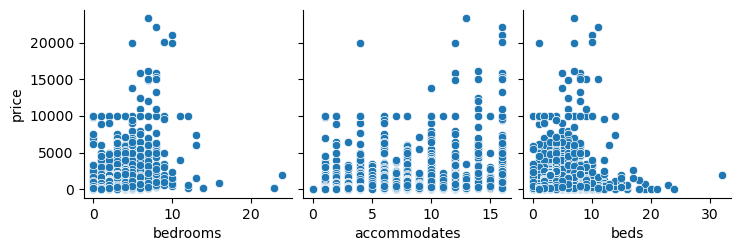

In [23]:
sns.pairplot(airbnb1, y_vars = ['price'], x_vars = ['bedrooms', 'accommodates', 'beds']);

3 more outliers stand out, specifically 20+ bedrooms and 30+ beds, given their rarity I am willing to sacrifice their inclusion in the model data to improve the inference and prediction for the other 99% of the listings

In [24]:
airbnb1 = airbnb1[(airbnb1['bedrooms'] < 20) & (airbnb1['beds'] < 30)]

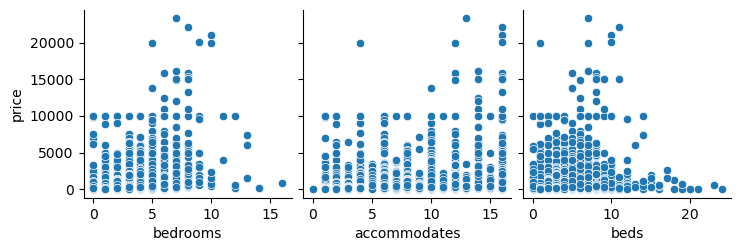

In [25]:
sns.pairplot(airbnb1, y_vars = ['price'], x_vars = ['bedrooms', 'accommodates', 'beds']);

Clean data shows more clear patterns and adds confidence to a linear relationship being present. Now I will re-check the correlation given the changes to the data

In [26]:
airbnb1.corr()[['price']].sort_values(by = 'price', ascending = False)

,price
price,1.000000
bedrooms,0.422009
accommodates,0.373523
beds,0.326229


It seems the changes to the data have significantly improved the correlation of the chosen variables to the target variable, 'price'

___

# Initial Modeling

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [28]:
X = airbnb1[['bedrooms', 'accommodates', 'beds']]
y = airbnb1['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Null Model

In [30]:
airbnb1['price'].mean()

267.1791391678623

Null Model in this case indicates price of a listing should be average price of all listings, which is $267.18

In [31]:
# breakfast hour week 4 Transformers Lesson
null = np.full_like(y_test, y_train.mean())

null

array([269.26411062, 269.26411062, 269.26411062, ..., 269.26411062,
       269.26411062, 269.26411062])

In [32]:
r2_score(y_test, null)

-0.00016466909421275489

Very poor r2 score for the null model which makes sense given the spread of the data.

### Linear Model

In [33]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [34]:
print(f'Train Score: {lr.score(X_train, y_train)}')
print(f'Test Score: {lr.score(X_test, y_test)}')
print(f'Cross Val Score: {cross_val_score(lr, X_train, y_train).mean()}')

Train Score: 0.17561602812490318
Test Score: 0.20206821697950694
Cross Val Score: 0.17822098837399497


Results look promising, similiar train and test score show the model is not overfit and a similar test and val score show we have a representative test set. Next I will add more features to see if the R2 can be significantly increased.

# Categorical Features

A lot of variables were left on the table for the initial analysis, most importantly categorical features and features that are numerical but need further cleaning to maximize value.

- Location based features, latitude and longitude had little correlation by themselves but how about a polynomial feature of the two combined?

In [35]:
# Removing outliers and Filling Nulls
airbnb_clean = airbnb[(airbnb['price'] < 25000.0) & (airbnb1['bedrooms'] < 20) & (airbnb1['beds'] < 30)]
airbnb_clean = airbnb_clean.fillna(0)

# Polynomial Features
airbnb_exp = airbnb_clean[['price', 'latitude', 'longitude']]

In [36]:
airbnb_exp['location'] = airbnb_exp['latitude'] * airbnb_exp['longitude']

In [37]:
airbnb_exp['location'].isnull().sum()

0

In [38]:
airbnb_exp.corr()[['price']].sort_values(by = 'price', ascending = False)

,price
price,1.000000
latitude,0.006991
location,-0.051879
longitude,-0.137062


Correlation proved too small to provide significant value, not too surprising given that AirBnb randomizes and occludes the exact location of a listing to provide more security to the host.

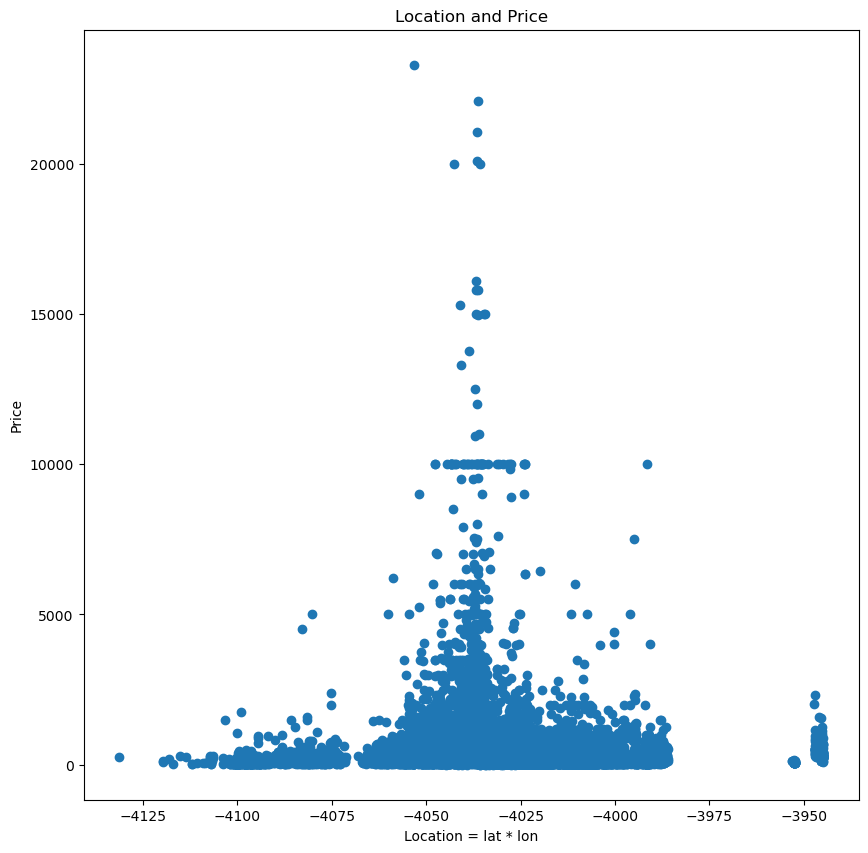

In [39]:
plt.figure(figsize = (10, 10))
plt.scatter(airbnb_exp['location'], airbnb_exp['price'])
plt.xlabel('Location = lat * lon')
plt.ylabel('Price')
plt.title('Location and Price');

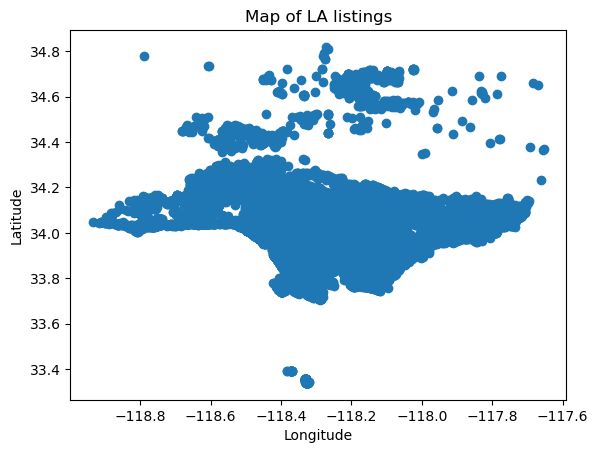

In [40]:
plt.scatter(airbnb_exp['longitude'], airbnb_exp['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of LA listings');

### Neighbouhoods

Inside Airbnb calculcated the neighbourhood using coordinates and a map of LA so I will explore that data next

In [41]:
airbnb_exp = airbnb_clean[['price', 'neighbourhood_cleansed']]

In [42]:
airbnb_exp['neighbourhood_cleansed'].describe()

count         40426
unique          265
top       Hollywood
freq           1708
Name: neighbourhood_cleansed, dtype: object

In [43]:
airbnb_exp.isnull().sum()

price                     0
neighbourhood_cleansed    0
dtype: int64

In [44]:
top_50 = airbnb_exp['neighbourhood_cleansed'].value_counts().head(50)

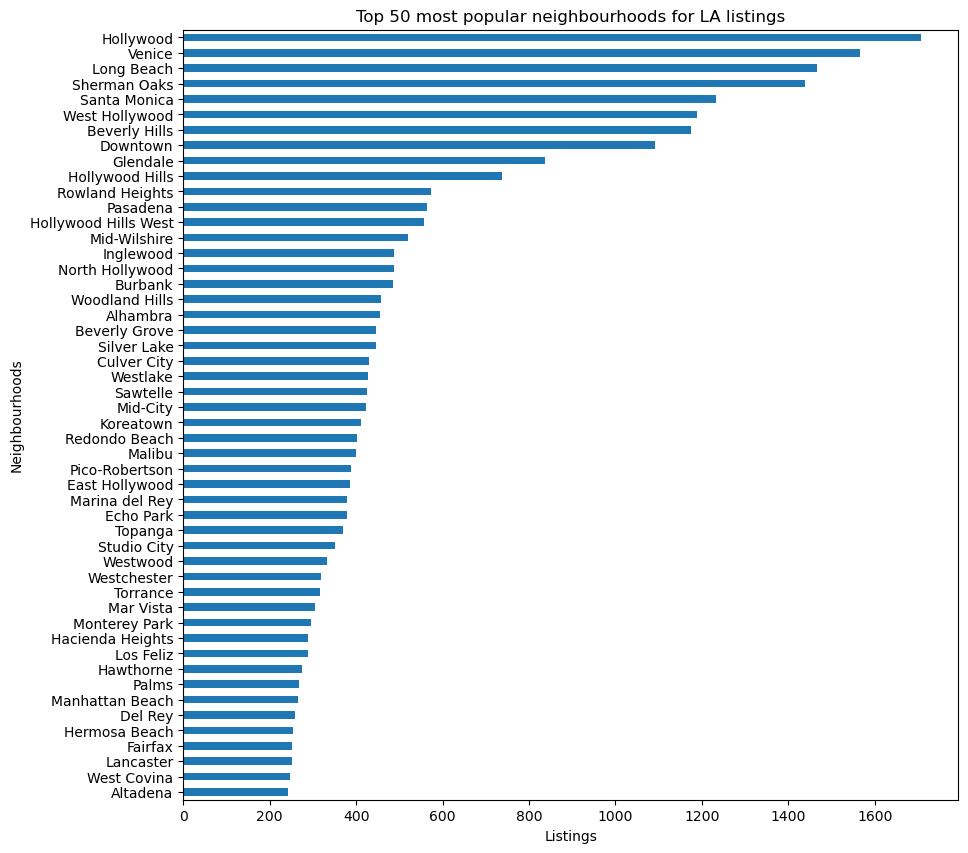

In [45]:
plt.figure(figsize = (10, 10))
top_50.sort_values().plot(kind='barh')
plt.xlabel('Listings')
plt.ylabel('Neighbourhoods')
plt.title('Top 50 most popular neighbourhoods for LA listings');

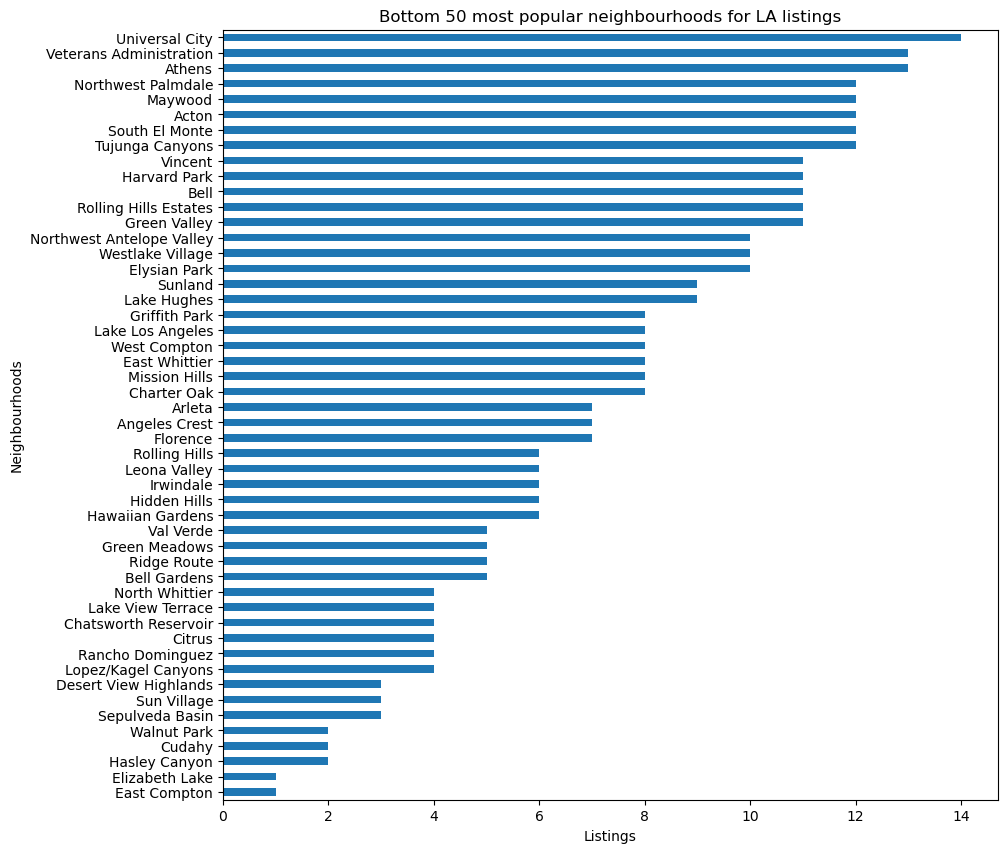

In [46]:
bottom_50 = airbnb_exp['neighbourhood_cleansed'].value_counts().tail(50)
plt.figure(figsize = (10, 10))
bottom_50.sort_values().plot(kind='barh')
plt.xlabel('Listings')
plt.ylabel('Neighbourhoods')
plt.title('Bottom 50 most popular neighbourhoods for LA listings');

In [47]:
# One Hot Encode to graph neighbourhoods
from sklearn.preprocessing import OneHotEncoder

In [48]:
# Transformers Lesson
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)

In [49]:
# One Hot Encode to graph neighbourhoods
features = ['bedrooms', 'accommodates', 'beds', 'neighbourhood_cleansed']

X = airbnb_clean[features]
y = airbnb_clean['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [51]:
X_train_ohe = ohe.fit_transform(X_train[['neighbourhood_cleansed']])
X_test_ohe = ohe.transform(X_test[['neighbourhood_cleansed']])

/Users/juanmarcucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [52]:
X_train_ohe.shape, X_test_ohe.shape

((30319, 262), (10107, 262))

In [53]:
lr_neighbourhood = LinearRegression()

lr_neighbourhood.fit(X_train_ohe, y_train)

LinearRegression()

In [54]:
print(f'Train Score: {lr_neighbourhood.score(X_train_ohe, y_train)}')
print(f'Test Score: {lr_neighbourhood.score(X_test_ohe, y_test)}')

Train Score: 0.12395935648647294
Test Score: -4.417222907007604e+16


Not only does the addition of neighbourhoods decrease the train r2 score significantly, it turns the test r2 score negative. I cannot recomment keeping the new one hot encoded variables.

### Host_since has the data of creation of host account

Change host_since date to datetime in order to graph it

In [55]:
airbnb_exp['host_since'] = pd.to_datetime(airbnb_clean['host_since'])

In [56]:
airbnb_exp['host_since'].isnull().sum()

0

In [57]:
# noticed some outlier dates, filterting them out, Airbnb was founded in 2008 so any date before that is a clearical error
airbnb_exp = airbnb_exp[airbnb_exp['host_since'] >= "2008"]

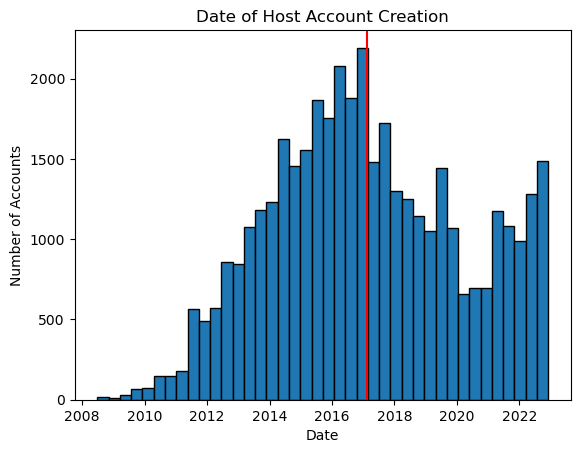

In [58]:
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.hist(airbnb_exp['host_since'], edgecolor = 'k', bins = 40)
plt.axvline(airbnb_exp['host_since'].mean(), color = 'red')
plt.xlabel('Date')
plt.ylabel('Number of Accounts')
plt.title('Date of Host Account Creation');

Linear models do not accept dates, therefore I will combine host_since and last_review to create a new column I will title "Host Experience"

In [59]:
airbnb_clean['last_review'].value_counts()

0             10577
2022-11-20      905
2022-11-27      882
2022-11-21      852
2022-11-26      673
              ...  
2017-02-21        1
2019-04-13        1
2018-07-02        1
2017-07-19        1
2017-05-19        1
Name: last_review, Length: 2337, dtype: int64

It seems too many of the accounts have never been reviewed. Not worth pursuing this avenue if I have to sacrifice almost 1/4 of the data. I don't see another way of converting this datetime data into length of account given the present data

### Host Location

Looking at the host locations to see if it's worth keeping as a variable

In [60]:
airbnb['host_location'].value_counts().head(20)

Los Angeles, CA              17923
California, United States     1029
New York, NY                   962
Santa Monica, CA               848
Long Beach, CA                 833
Beverly Hills, CA              736
Pasadena, CA                   448
West Hollywood, CA             438
San Francisco, CA              371
Redondo Beach, CA              291
Glendale, CA                   255
Rowland Heights, CA            248
Torrance, CA                   239
Malibu, CA                     237
Burbank, CA                    235
Marina del Rey, CA             223
United States                  218
Alhambra, CA                   215
Inglewood, CA                  202
Arcadia, CA                    200
Name: host_location, dtype: int64

In [61]:
airbnb['host_location'].describe()

count               32661
unique                780
top       Los Angeles, CA
freq                17923
Name: host_location, dtype: object

Too many possibilities to one-hot encode or dumify this variable, using neighbourhoods.csv I can binarize the column to "In LA or not"

In [62]:
neighbourhoods_df = pd.read_csv('../data/neighbourhoods.csv')

neighbourhoods = neighbourhoods_df['neighbourhood'].tolist()

In [63]:
airbnb['host_location'].head()

0      Los Angeles, CA
1      Los Angeles, CA
2      Culver City, CA
3      Los Angeles, CA
4    San Francisco, CA
Name: host_location, dtype: object

In [64]:
# Need to take off the comma and everything after it so it matches the list of neighbourhoods
# https://stackoverflow.com/questions/47024428/replace-column-values-using-regex-in-pandas-data-frame

airbnb_clean['local_host'] = airbnb_clean['host_location'].str.split(',').str[0]

airbnb_clean['local_host'].head()

0      Los Angeles
1      Los Angeles
2      Culver City
3      Los Angeles
4    San Francisco
Name: local_host, dtype: object

In [65]:
# Binarizing the column
airbnb_clean['local_host_b'] = airbnb_clean['local_host'].map(lambda location: 1 if location in neighbourhoods else 0)

airbnb_clean['local_host_b'].value_counts()

0    31028
1     9398
Name: local_host_b, dtype: int64

To decided whether the variable is worth keeping I want to see if there is a noticeable difference in price between both conditions.

In [66]:
airbnb_clean.groupby('local_host_b')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
local_host_b,,,,,,,,
0,31028.0,257.333447,607.444235,0.0,87.0,139.0,233.0,23286.0
1,9398.0,299.685219,849.063273,0.0,80.0,135.0,241.0,21053.0


There is enough of a difference so I will keep the new column

#### Testing out new model

In [67]:
features = ['bedrooms', 'accommodates', 'beds', 'local_host_b']

X = airbnb_clean[features]
y = airbnb_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr_lhost = LinearRegression()
lr_lhost.fit(X_train, y_train)

print(f'Train Score: {lr_lhost.score(X_train, y_train)}')
print(f'Test Score: {lr_lhost.score(X_test, y_test)}')

Train Score: 0.1759479052313998
Test Score: 0.2025666715144342


No noticeable increase in either r2 score. Not worth keeping in the model.

### Bathrooms Text

Because of a change in the Airbnb website the number of bathrooms are no longer stored as floats, they are strings describing the number of bathrooms. I will explore this data to see if it's worth adding to the model.

In [68]:
airbnb['bathrooms_text'].value_counts()

1 bath               17076
2 baths               6276
1 shared bath         3923
1 private bath        3762
2.5 baths             2407
3 baths               1464
1.5 baths             1457
1.5 shared baths       667
3.5 baths              630
4 baths                484
2 shared baths         458
4.5 baths              356
5.5 baths              204
5 baths                181
6 baths                118
2.5 shared baths       117
3 shared baths         108
8 shared baths          97
6.5 baths               63
0 shared baths          62
7 baths                 54
3.5 shared baths        51
8 baths                 50
Shared half-bath        47
0 baths                 43
4 shared baths          42
Half-bath               35
7.5 baths               29
11 shared baths         26
8.5 baths               25
9 baths                 15
5 shared baths          14
Private half-bath       10
10 baths                10
9.5 baths                7
12 baths                 5
10.5 baths               3
1

In [69]:
airbnb['bathrooms_text'].describe()

count      40398
unique        51
top       1 bath
freq       17076
Name: bathrooms_text, dtype: object

In [70]:
airbnb['bathrooms_text'].isnull().sum()

40

The data appears to be made up primarly of two components, the number of bathrooms and whether or not they are private. First I will extract the number of bathrooms. 

In [71]:
airbnb_bath = airbnb[['price', 'bathrooms_text']]

airbnb_bath = airbnb_bath.fillna(0)

In [72]:
airbnb_bath.isnull().sum()

price             0
bathrooms_text    0
dtype: int64

In [73]:
# https://www.regular-expressions.info/floatingpoint.html
airbnb_bath['bathrooms'] = airbnb_bath['bathrooms_text'].str.extract(r'(\d+\.?\d?)').astype(float)

airbnb_bath['bathrooms'].value_counts()

1.0     24761
2.0      6734
2.5      2524
1.5      2124
3.0      1572
3.5       681
4.0       526
4.5       359
5.5       205
5.0       195
8.0       147
6.0       118
0.0       105
6.5        63
7.0        54
7.5        29
11.0       28
8.5        26
9.0        15
10.0       11
9.5         7
12.0        5
11.5        3
12.5        3
13.0        3
10.5        3
13.5        1
25.0        1
21.0        1
20.0        1
15.0        1
Name: bathrooms, dtype: int64

In [74]:
airbnb_bath.corr()[['price']].sort_values(by = 'price', ascending = False)

,price
price,1.000000
bathrooms,0.282281


Promising correaltion number between number of bathrooms and price, I will perform some further cleaning before testing out the variable in a new model.

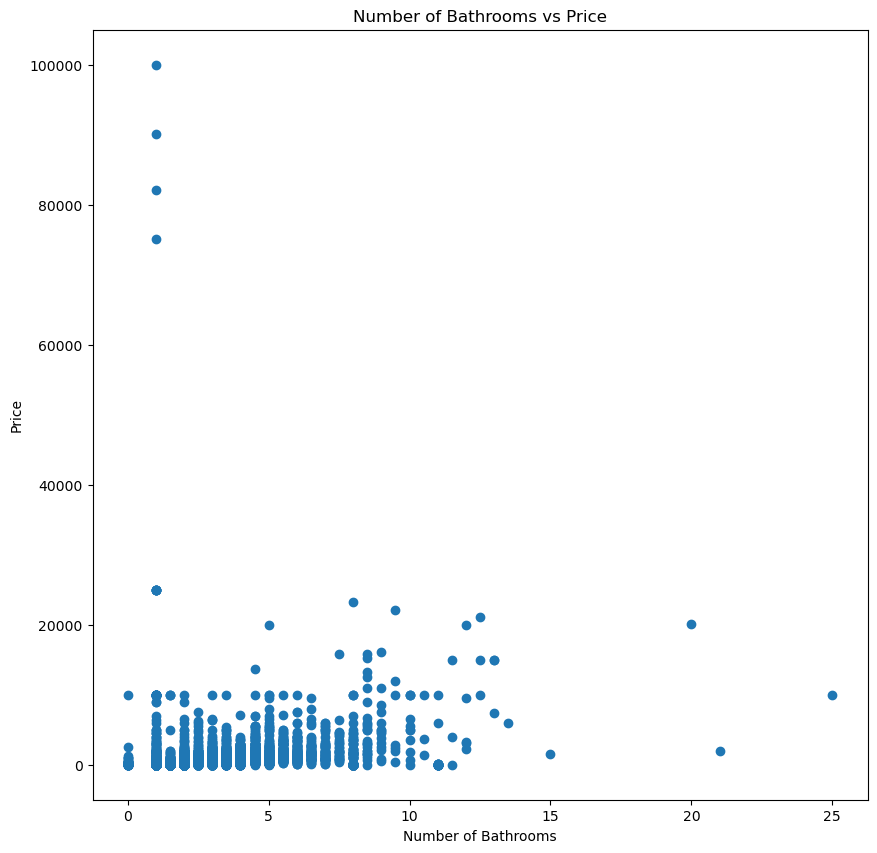

In [75]:
plt.figure(figsize = (10, 10))
plt.scatter(airbnb_bath['bathrooms'], airbnb_bath['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs Price');

There seem to be a few outliers that can be elimiated from the data.

In [76]:
airbnb_bath = airbnb_bath[(airbnb_bath['bathrooms'] < 15) & (airbnb_bath['price'] < 25000)]

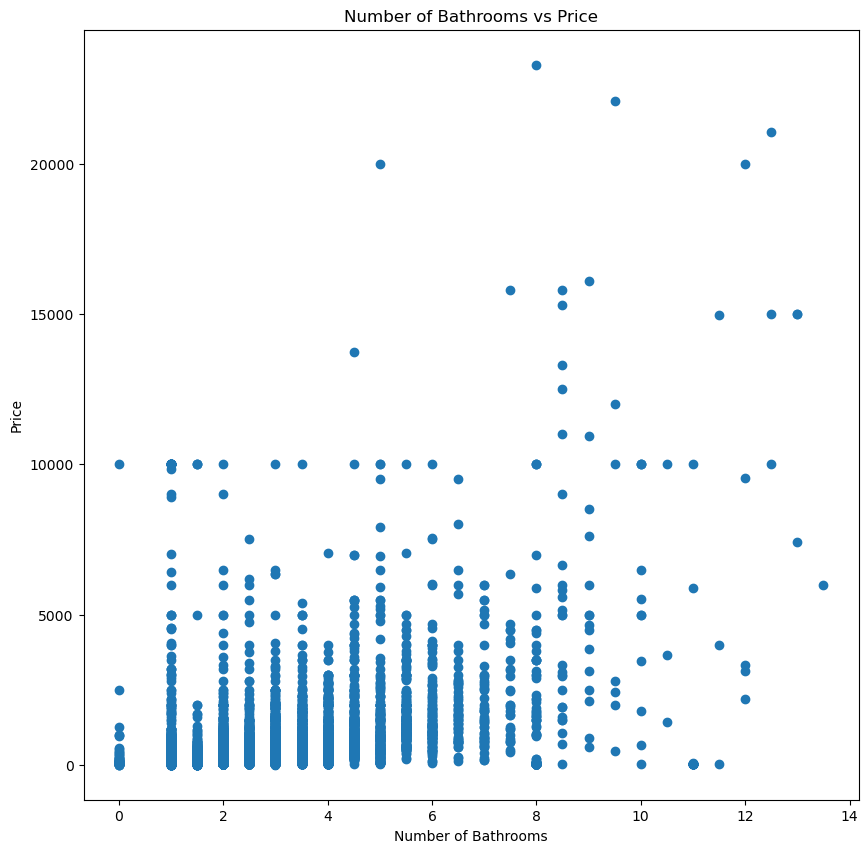

In [77]:
plt.figure(figsize = (10, 10))
plt.scatter(airbnb_bath['bathrooms'], airbnb_bath['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs Price');

In [78]:
airbnb_bath.corr()[['price']].sort_values(by = 'price', ascending = False)

,price
price,1.000000
bathrooms,0.480645


With some data cleaning and elimination of ouliers the new "bathrooms" variable is a great candidate for the model.

### Room Type

Last promising variable is room type, which should offer insight into the types of listings offered and will hopefully show a linear relationship

In [79]:
airbnb['room_type'].value_counts()

Entire home/apt    28317
Private room       11253
Shared room          784
Hotel room            84
Name: room_type, dtype: int64

In [80]:
airbnb['room_type'].isnull().sum()

0

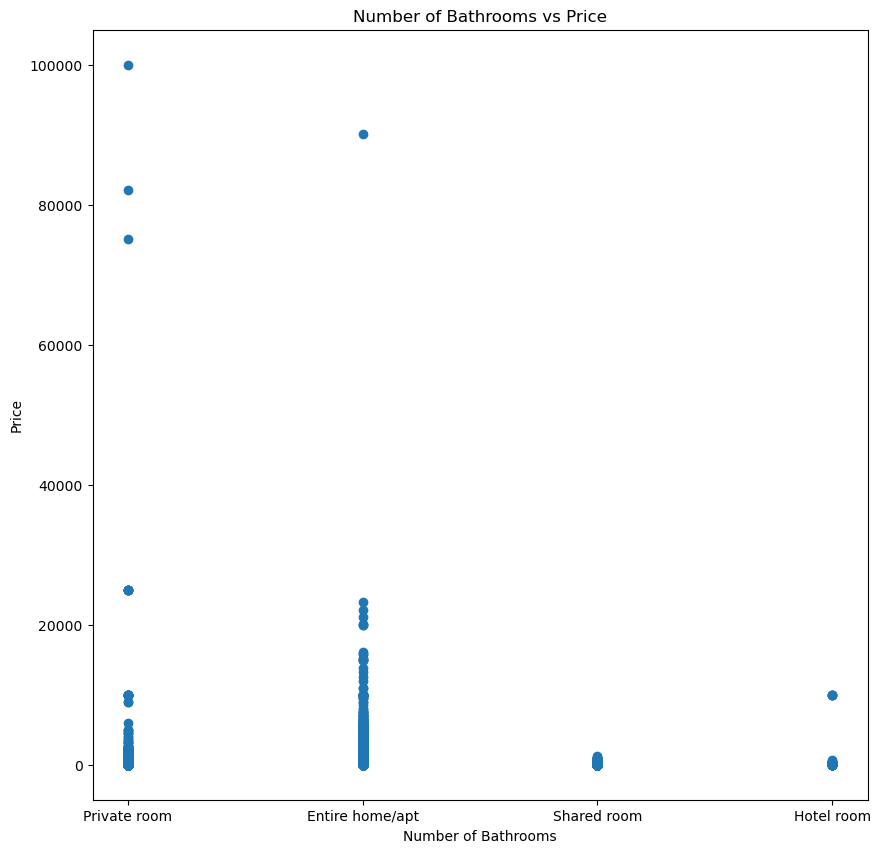

In [81]:
plt.figure(figsize = (10, 10))
plt.scatter(airbnb['room_type'], airbnb['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs Price');

In [82]:
airbnb_room = airbnb[airbnb['price'] < 25000]

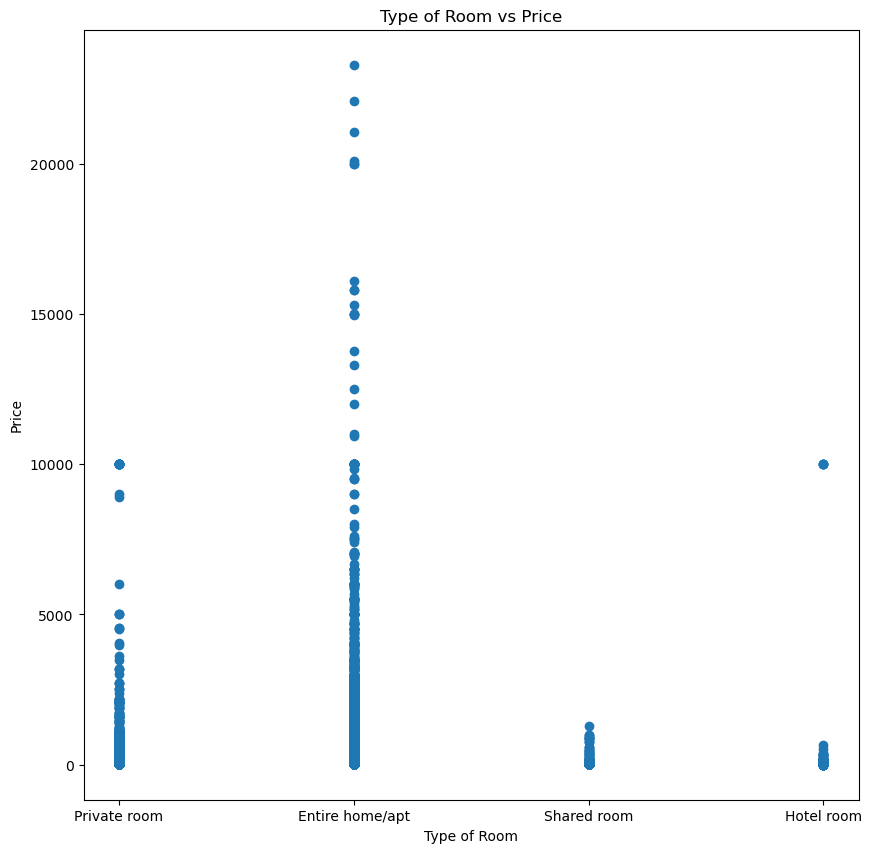

In [83]:
plt.figure(figsize = (10, 10))
plt.scatter(airbnb_room['room_type'], airbnb_room['price'])
plt.xlabel('Type of Room')
plt.ylabel('Price')
plt.title('Type of Room vs Price');

Initial EDA shows a promising pattern, further testing is needed.

## Final Model

In [84]:
airbnb_final = airbnb[['bedrooms', 'accommodates', 'beds', 'bathrooms_text', 'room_type', 'price']]

In [85]:
# Converting all orginal data to fit Linear Regression
airbnb_final = airbnb_final.fillna(0)
airbnb_final['bathrooms_text'] = airbnb_final['bathrooms_text'].str.extract(r'(\d+\.?\d?)').astype(float)
airbnb_final = pd.get_dummies(columns = ['room_type'], data = airbnb_final, drop_first=True)
airbnb_final = airbnb_final[(airbnb_final['bathrooms_text'] < 15) & (airbnb['price'] < 25000) & (airbnb1['bedrooms'] < 20) & (airbnb1['beds'] < 30)]

In [86]:
X = airbnb_final.drop(columns='price')
y = airbnb_final['price']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr_final = LinearRegression()
lr_final.fit(X_train, y_train)

print(f'Train Score: {lr_final.score(X_train, y_train)}')
print(f'Test Score: {lr_final.score(X_test, y_test)}')

Train Score: 0.2526142937819176
Test Score: 0.258265166841802


Using only a Linear Regression Model the highest r2 score achieved was 0.25 for the train and test set, meaning only 25% of the variability in price for LA listings in the quarter of June 2022 can be explained by the model.

# Next Steps and Recommendations

After extensive feature selection and engineering next steps would be trying different models and loading in more data. It seems that the features we have at the moment might not be the best for predicting prices of the listings. After that intergrating the model into a web browser widget would be the priority, so that the model could be tested against new data such as brand new listings.